# Reading Data
Reading files that contain the biased (WikiDetox) and unbiased (50/50 aggressive/unaggressive) data

In [143]:
#Version 0.0 ---Original unbalanced data input

import nltk
from nltk.stem import WordNetLemmatizer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import ndimage as nd
import re

Number_of_entry = 10000 #maximum acceptable 29560
#input data and clean up
data = pd.read_csv('aggression_annotated_comments.tsv', sep = '\t', nrows = Number_of_entry)

comment_data_b = data.comment
comment_data_b = np.asarray(comment_data_b)
print("biased data inputed")

biased data inputed


In [144]:
#unbiased data input
import nltk
from nltk.stem import WordNetLemmatizer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import ndimage as nd
import re

Number_of_entry = 29560 #maximum acceptable 29560
#input data and clean up
agg_data = pd.read_csv('Aggressive_comments.tsv', sep = '\t', nrows = Number_of_entry/2)
neu_data = pd.read_csv('Neutral_comments.tsv', sep = '\t', nrows = Number_of_entry/2)

agg_comment = agg_data.comment
neu_comment = neu_data.comment
agg_target = agg_data.aggression
neu_target = neu_data.aggression

comment_data = np.asarray(agg_comment.append(neu_comment))
target_unbias = np.asarray(agg_target.append(neu_target))
print("unbias data inputed")
print("comment_data & target_unbias")



unbias data inputed
comment_data & target_unbias


In [145]:
#Test unbiased scored data 
#new
agg_data_s = pd.read_csv('Aggressive_scored.tsv', sep = '\t', nrows = Number_of_entry/2)
neu_data_s = pd.read_csv('Friendlier_scored.tsv', sep = '\t', nrows = Number_of_entry/2)

agg_comment_s = agg_data_s.comment
neu_comment_s = neu_data_s.comment
agg_target_s = agg_data_s.aggression_score
neu_target_s = neu_data_s.aggression_score

trial_comment = np.asarray(agg_comment_s.append(neu_comment_s))
trial_score = np.asarray(agg_target_s.append(neu_target_s))
print("trial data inputed")
print("trial_comment & trial_score")

trial data inputed
trial_comment & trial_score


# Preprocessing
Removes punctuation, newlinetoken, stop words for unbiased and biased data, lemmatizes

In [146]:
#first step of preprocessing
PUNCTUATION_NO_SPACE = re.compile("[.;:!*=<>`_'?¿,\"()\[\]]")
PUNCTUATION_SPACE = re.compile("-")
NEWLINE = re.compile("newlinetoken")
#This is more or less the nltk stop list with negations removed
skip = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", 'im',"youre",
        "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 
        'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 
        'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 
        "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 
        'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'if', 'or', 'ive',
        'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'between', 
        'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 
        'out', 'on', 'off', 'over', 'under', 'further', 'then', 'once', 'here', 'there', 'theres','when', 'where',
        'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such',
        'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 
        'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y','u','ur']

#unbiased
for i in range(comment_data.size):
    comment_data[i] = PUNCTUATION_NO_SPACE.sub("",comment_data[i].lower())
    comment_data[i] = NEWLINE.sub("",comment_data[i])
    comment_data[i] = PUNCTUATION_SPACE.sub(" ",comment_data[i].lower())
    comment_data[i] = comment_data[i].split()
    comment_data[i] = [word for word in comment_data[i] if word not in skip]


#biased
for i in range(comment_data_b.size):
    comment_data_b[i] = PUNCTUATION_NO_SPACE.sub("",comment_data_b[i].lower())
    comment_data_b[i] = NEWLINE.sub("",comment_data_b[i])
    comment_data_b[i] = PUNCTUATION_SPACE.sub(" ",comment_data_b[i].lower())
    comment_data_b[i] = comment_data_b[i].split()
    comment_data_b[i] = [word for word in comment_data_b[i] if word not in skip]
    
print(comment_data[0])

#stop_list = nltk.corpus.stopwords.words("english")

['click', 'annoying', 'users', 'link', 'guess', 'massachusetts', 'republic', 'defending', 'facts', 'against', 'lies', 'determined', 'zealots', 'seems', 'particular', 'sticking', 'place', 'wikipedia', '0258', 'feb', '21', '2003', 'utc']


In [147]:
#scored trial
for i in range(trial_comment.size):
    trial_comment[i] = PUNCTUATION_NO_SPACE.sub("",trial_comment[i].lower())
    trial_comment[i] = NEWLINE.sub("",trial_comment[i])
    trial_comment[i] = PUNCTUATION_SPACE.sub(" ",trial_comment[i].lower())
    trial_comment[i] = trial_comment[i].split()
    trial_comment[i] = [word for word in trial_comment[i] if word not in skip]
print("ok")

ok


In [148]:
#Removing different ending of the same word
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

for i in range(comment_data.size):
    lemmatizer = WordNetLemmatizer()
    comment_data[i] = ' '.join([lemmatizer.lemmatize(word) for word in comment_data[i]])
    
for i in range(comment_data_b.size):
    lemmatizer = WordNetLemmatizer()
    comment_data_b[i] = ' '.join([lemmatizer.lemmatize(word) for word in comment_data_b[i]])
    
print(comment_data_b[0])

[nltk_data] Downloading package wordnet to /Users/Fenggq/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


not creative dictionary definition term insurance ensurance properly applied destruction dont understand fine legitimate criticism ill write three man cell bounty hunter easy understand ensured insured different differ assuredthe sentence quote absolutely neutral arent familiar underlying theory strike back eg submarine employed nuclear warfare guiding insurance nor likely three man cell structure kept ira broken british thats fault fine fix explain but nothing personal creative itim tired arguing article multi party turn plenty use mutually mutual apply standard id moving mutual assured destruction talk not appealing reagan voter bias effectiveness dropping lythere double standard edits come u history book like peace movement mad defined 1950 like even definition totally useless 2002 historical interest make even obvious connection implication language chosen multiple profession specific term consider somehow non neutral gandhi think eye eye describes riot death penalty war but dont k

In [149]:
#trial scored 
for i in range(trial_comment.size):
    lemmatizer = WordNetLemmatizer()
    trial_comment[i] = ' '.join([lemmatizer.lemmatize(word) for word in trial_comment[i]])
    
print("ok")

ok


In [150]:
#Input target for binary model(aggressive or neutral)
annotation = pd.read_csv('aggression_annotations.tsv', sep = '\t', nrows=Number_of_entry*20)
rev_id = annotation.rev_id
target_raw = annotation.aggression
target_pro = np.zeros(Number_of_entry)

ctr = 0
ctr_aggre = 0
ctr_neut = 0
for i in range(target_pro.size):
    ctr2 = 0
    aggr = 0
    curr_rev_id = rev_id[ctr]
    while curr_rev_id == rev_id[ctr]:
        aggr += target_raw[ctr]
        ctr += 1
        ctr2 += 1
    #print(ctr2)
    if (aggr/ctr2 > 0.5):
        target_pro[i] = 1
        ctr_aggre += 1
    else:
        target_pro[i] = 0
        ctr_neut += 1

print('Number of Aggressive comments within the sample:', ctr_aggre)
print('Number of Neutral comments within the sample:', ctr_neut)
print('Percentage of Aggressive comments in biased dataset: %', (ctr_aggre / Number_of_entry)*100)

ctr_aggre_unbias = 0
for i in range(target_unbias.size):
    if (target_unbias[i] > 0.5):
        target_unbias[i] = 1
        ctr_aggre_unbias += 1
    else:
        target_unbias[i] = 0
print('Percentage of Aggressive comments in unbiased dataset: %', (ctr_aggre_unbias/ Number_of_entry)*100)

Number of Aggressive comments within the sample: 3627
Number of Neutral comments within the sample: 25933
Percentage of Aggressive comments in biased dataset: % 12.269959404600812
Percentage of Aggressive comments in unbiased dataset: % 50.0


In [151]:
#Calculates target scores based on scores of 2 to -2 
#(most friendly to most aggressive)
score_raw = annotation.aggression_score
score_pro = np.zeros(Number_of_entry)


#biased
ctr = 0
ctr0 = 0
ctr1 = 0
ctr2 = 0
ctr3 = 0
ctr4 = 0
for i in range(score_pro.size):
    count = 0
    aggr = 0
    curr_rev_id = rev_id[ctr]
    while curr_rev_id == rev_id[ctr]:
        aggr += score_raw[ctr]
        count += 1
        ctr += 1 
    if (count == 0):
        print("problem with", ctr)
        print(rev_id[ctr])
        break
    if (aggr/count > 1.5):
        score_pro[i] = 4
        ctr4 += 1
    elif (aggr/count > 0.5):
        score_pro[i] = 3
        ctr3 += 1
    elif (aggr/count > -0.5):
        score_pro[i] = 2
        ctr2 += 1
    elif (aggr/count > -1.5):
        score_pro[i] = 1
        ctr1 += 1
    else:
        score_pro[i] = 0
        ctr0 += 1
    
print("Number of 0 scored comments in biased sample:", ctr0)
print("Number of 1 scored comments in biased sample:", ctr1)
print("Number of 2 scored comments in biased sample:", ctr2)
print("Number of 3 scored comments in biased sample:", ctr3)
print("Number of 4 scored comments in biased sample:", ctr4)
print("Percentage of 2 scored comments in biased sample: ", (ctr2/score_pro.size))
print("\n")


#Trial data
trial_target = np.zeros(Number_of_entry)

ctr = 0
ctr0 = 0
ctr1 = 0
ctr2 = 0
ctr3 = 0
ctr4 = 0

for i in range(Number_of_entry):
    if (trial_score[i] > 3.5):
        trial_target[i] = 4
        ctr4 += 1
    elif (trial_score[i] > 2.5):
        trial_target[i] = 3
        ctr3 += 1
    elif (trial_score[i] > 1.5):
        trial_target[i] = 2
        ctr2 += 1
    elif (trial_score[i] > 0.5):
        trial_target[i] = 1
        ctr1 += 1
    else:
        trial_target[i] = 0
        ctr0 += 1
    
print("Number of 0 scored comments in unbiased sample:", ctr0)
print("Number of 1 scored comments in unbiased sample:", ctr1)
print("Number of 2 scored comments in unbiased sample:", ctr2)
print("Number of 3 scored comments in unbiased sample:", ctr3)
print("Number of 4 scored comments in unbiased sample:", ctr4)
print("Percentage of 2 scored comments in unbiased sample: ", (ctr2/Number_of_entry))

Number of 0 scored comments in biased sample: 1895
Number of 1 scored comments in biased sample: 3792
Number of 2 scored comments in biased sample: 22565
Number of 3 scored comments in biased sample: 1271
Number of 4 scored comments in biased sample: 37
Percentage of 2 scored comments in biased sample:  0.7633626522327469


Number of 0 scored comments in unbiased sample: 8146
Number of 1 scored comments in unbiased sample: 6697
Number of 2 scored comments in unbiased sample: 13833
Number of 3 scored comments in unbiased sample: 855
Number of 4 scored comments in unbiased sample: 29
Percentage of 2 scored comments in unbiased sample:  0.4679634641407307


# Model for binary prediction
Uses the TfidfVectorizer and LinearSVC model

In [162]:
#model for binary predicting
#default TF-idf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC


#print(type(comment_data[0]))
ngram_arc = np.zeros(5)

comment_data = np.asarray(comment_data)

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 1))
tfidf_vectorizer.fit(comment_data)
comment_vectorized = tfidf_vectorizer.transform(comment_data)
    
def accuracy_test(ind, c=0.01, trials=100):
    total = 0
    #print(comment_vectorized.shape)
    model = None
    for i in range(trials):
        data_train, data_test, target_train, target_test = train_test_split(
            comment_vectorized, target_unbias, test_size = 0.1)

        model = LinearSVC(C=0.01)
        model.fit(data_train, target_train)
        total += accuracy_score(target_test, model.predict(data_test))
    accuracy = total / trials
    ngram_arc[ind] = accuracy
    print("Unbias data Accuracy: ", accuracy)
    return model

model_ub = accuracy_test(ind = 2)


tfidf_vectorizer_b = TfidfVectorizer(ngram_range=(1, 3))
tfidf_vectorizer_b.fit(comment_data_b)
comment_vectorized_b = tfidf_vectorizer_b.transform(comment_data_b)

data_train_b, data_test_b, target_train_b, target_test_b = train_test_split(
    comment_vectorized_b, target_pro, test_size = 0.1)

model_bias = LinearSVC(C=0.01)
model_bias.fit(data_train_b, target_train_b)
accuracy = accuracy_score(target_test_b, model_bias.predict(data_test_b))
print("Bias data Accuracy: ", accuracy)

Unbias data Accuracy:  0.843041271989175


ValueError: Found input variables with inconsistent numbers of samples: [10000, 29560]

In [153]:
#model for binary predicting
#default TF-idf vectorizer
#with ngram = 1-5
for j in range(ngram_arc.size):
    tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, j+1))
    tfidf_vectorizer.fit(comment_data)
    comment_vectorized = tfidf_vectorizer.transform(comment_data)
    model_ub_1 = accuracy_test(ind = j, trials = 50)

Unbias data Accuracy:  0.8418200270635997
Unbias data Accuracy:  0.835236806495264
Unbias data Accuracy:  0.8302029769959407
Unbias data Accuracy:  0.826346414073072
Unbias data Accuracy:  0.8243978349120432


<function matplotlib.pyplot.show(*args, **kw)>

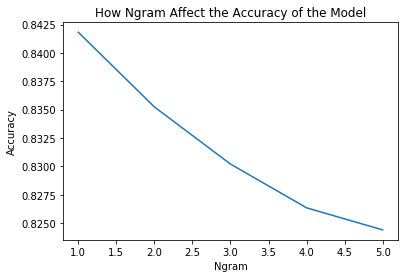

In [154]:
fig, ax = plt.subplots()
ax.plot([1,2,3,4,5],ngram_arc)
ax.set(xlabel='Ngram', ylabel='Accuracy',
       title='How Ngram Affect the Accuracy of the Model')
plt.show

In [155]:
#Words most associated with aggression/friendliness

def agg_friendly_words(model, tv):
    feature_to_coef = {
        word: coef for word, coef in zip(
            tv.get_feature_names(), model.coef_[0]
        )
    }

    for best_negative in sorted(feature_to_coef.items(), key=lambda x: x[1], reverse=True)[:10]:
        print ("Aggressive: ", best_negative)

    for best_positive in sorted(feature_to_coef.items(), key=lambda x: x[1])[:10]:
        print ("Friendly: ", best_positive)

print("Unbiased model")
agg_friendly_words(model_ub, tfidf_vectorizer)
print("Biased model")
agg_friendly_words(model_bias, tfidf_vectorizer_b)


Unbiased model
Aggressive:  ('chutzpah fucking', 2.201751888796368)
Aggressive:  ('citing better driver better looking', 1.5683902798645415)
Aggressive:  ('hadas flew', 1.1391597531455668)
Aggressive:  ('howl protest gang gutless thug', 1.0414044718240714)
Aggressive:  ('hot debate including arcticle', 0.9205611034093564)
Aggressive:  ('agree serbia would', 0.8977057281636251)
Aggressive:  ('correct noticeboard', 0.8799959714203902)
Aggressive:  ('another question but', 0.8542800083569695)
Aggressive:  ('air force think', 0.8279199360433724)
Aggressive:  ('homo asswipe suck balls dick', 0.7319747614520095)
Friendly:  ('again thou wilt worst', -1.1459386791637038)
Friendly:  ('arbitrarily deciding whether', -0.680203619595961)
Friendly:  ('implying policy force', -0.6376439611385017)
Friendly:  ('enslavement seeing still generally', -0.6319969297301548)
Friendly:  ('lazy as keeping admin back', -0.6097469615053794)
Friendly:  ('fermi scale published herbert', -0.5891813190403585)
Friend

In [156]:
#check predicted aggressive comments by the unbias model
pred_result = model_ub.predict(comment_vectorized)
print(pred_result.shape)

index_arr = []

pred_ctr = 0
for i in range(pred_result.size):
    #print(int(pred_result[0]))
    if(int(pred_result[i]) == 1):
        print(i)
        print(comment_data[i])
        index_arr.append(i)
        pred_ctr += 1
        
index_arr = np.asarray(index_arr)
print(index_arr.shape)
    
accuracy2 = accuracy_score(target_unbias, model.predict(comment_vectorized))
print(accuracy2)

ValueError: X has 3003415 features per sample; expecting 1457912

# Model for score prediction
Uses the biased and trial datasets

In [16]:
#Training and testing with biased score data
data_s_train, data_s_test, score_train, score_test = train_test_split(
    comment_vectorized, score_pro, test_size = 0.1)

score_model = LinearSVC(C=0.01)
score_model.fit(data_s_train, score_train)
score_accuracy = accuracy_score(score_test, score_model.predict(data_s_test))
print("Linear SVC", score_accuracy)

lr_model = LogisticRegression(C=1)
lr_model.fit(data_s_train, score_train)
lr_accuracy = accuracy_score(score_test, lr_model.predict(data_s_test))
print("Logistic regression", lr_accuracy)


def accuracy_test(c=0.01, trials=100):
    total = 0
    for i in range(trials):
        data_s_train, data_s_test, score_train, score_test = train_test_split(
            comment_vectorized, score_pro, test_size = 0.1)

        score_model = LinearSVC(C=0.01,multi_class='ovr')
        score_model.fit(data_s_train, score_train)
        total += accuracy_score(score_test, score_model.predict(data_s_test))
    accuracy = total / trials
    print("Accuracy: ", accuracy)

#accuracy_test()

def lr_test(c=0.01, trials=100):
    total = 0
    for i in range(trials):
        data_s_train, data_s_test, score_train, score_test = train_test_split(
            comment_vectorized, score_pro, test_size = 0.1)

        score_model = LogisticRegression(C=c,multi_class='ovr')
        score_model.fit(data_s_train, score_train)
        total += accuracy_score(score_test, score_model.predict(data_s_test))
    accuracy = total / trials
    print("LR accuracy: ", accuracy)
#lr_test(c=0.05)
#lr_test(c=1)

Linear SVC 0.786


/Users/Kiara/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Kiara/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Logistic regression 0.786


In [65]:
#Trial data training

trial_comment = np.asarray(trial_comment)
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3))
tfidf_vectorizer.fit(trial_comment)
trial_data = tfidf_vectorizer.transform(trial_comment)


trial_data_train, trial_data_test, trial_target_train, trial_target_test = train_test_split(
    trial_data, trial_target, test_size = 0.1)

trial_model = LinearSVC(C=0.01)
trial_model.fit(trial_data_train, trial_target_train)
trial_accuracy = accuracy_score(trial_target_test, trial_model.predict(trial_data_test))
print("Linear SVC", trial_accuracy)

lrt_model = LogisticRegression(C=1)
lrt_model.fit(trial_data_train, trial_target_train)
lrt_accuracy = accuracy_score(trial_target_test, lrt_model.predict(trial_data_test))
print("Logistic regression", lrt_accuracy)


Linear SVC 0.5855886332882273
Logistic regression 0.7046684709066305


In [66]:
agg_friendly_words(model)
print("\n")
agg_friendly_words(score_model)
print("\n")
agg_friendly_words(lr_model)
print("\n")

#trial test
agg_friendly_words(lrt_model)

Aggressive:  ('attributed someone', 0.23491607645633283)
Aggressive:  ('currentevery', 0.11749637590890326)
Aggressive:  ('atzinger elementary sound', 0.11434924860568735)
Aggressive:  ('cortina ridiculous per', 0.10574286427852847)
Aggressive:  ('cry roody poo', 0.10208738189546417)
Friendly:  ('acceptable article', -0.09451934763060152)
Friendly:  ('document would like', -0.06109230532227004)
Friendly:  ('deal arrest', -0.053420497102448956)
Friendly:  ('character show', -0.04770249240067263)
Friendly:  ('afd since', -0.04678718205309883)


Aggressive:  ('attributed someone', 0.2674812500600174)
Aggressive:  ('atzinger elementary sound', 0.11678182458311004)
Aggressive:  ('currentevery', 0.10835483181271882)
Aggressive:  ('adjective malaysia hope', 0.08864126717182169)
Aggressive:  ('accuracy scientology extremely', 0.0679357661798639)
Friendly:  ('acceptable article', -0.059653230917070185)
Friendly:  ('care article vandalizes', -0.05758289910132432)
Friendly:  ('character show', -0

In [157]:
#model for binary predicting
# TF-idf vectorizer with 'char_wb' analyzer
ngram_arc_wb = np.zeros(5)
ngram_arc_char = np.zeros(5)
def accuracy_test_wb(ind, c=0.01, ngram=3, trials=100):
    total = 0
    tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, ngram), analyzer='char_wb')
    tfidf_vectorizer.fit(comment_data)
    comment_vectorized = tfidf_vectorizer.transform(comment_data)

    #print(comment_vectorized.shape)
    for i in range(trials):
        data_train, data_test, target_train, target_test = train_test_split(
            comment_vectorized, target_unbias, test_size = 0.1)

        model = LinearSVC(C=0.01)
        model.fit(data_train, target_train)
        total += accuracy_score(target_test, model.predict(data_test))
    accuracy = total / trials
    ngram_arc_wb[ind] = accuracy
    print("Accuracy: ", accuracy)
    
# TF-idf vectorizer with 'char' analyzer
def accuracy_test_char(ind, c=0.01, ngram=3, trials=100):
    total = 0
    tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, ngram), analyzer='char')
    tfidf_vectorizer.fit(comment_data)
    comment_vectorized = tfidf_vectorizer.transform(comment_data)

    #print(comment_vectorized.shape)
    for i in range(trials):
        data_train, data_test, target_train, target_test = train_test_split(
            comment_vectorized, target_unbias, test_size = 0.1)

        model = LinearSVC(C=0.01)
        model.fit(data_train, target_train)
        total += accuracy_score(target_test, model.predict(data_test))
    accuracy = total / trials
    ngram_arc_char[ind] = accuracy
    print("Accuracy: ", accuracy)

#accuracy_test_wb(ngram=5)
#accuracy_test_char(ngram=5)

In [141]:
for j in range(ngram_arc_wb.size):
    accuracy_test_wb(ind = j, trials = 50, ngram = j+1)
    accuracy_test_char(ind = j, trials = 50, ngram = j+1)

Accuracy:  0.6937415426251694
Accuracy:  0.6930175913396482
Accuracy:  0.7630311231393775
Accuracy:  0.7697361299052775
Accuracy:  0.8046346414073071
Accuracy:  0.8088362652232748
Accuracy:  0.8231190798376182
Accuracy:  0.824343707713126
Accuracy:  0.8310419485791612
Accuracy:  0.8258254397834913


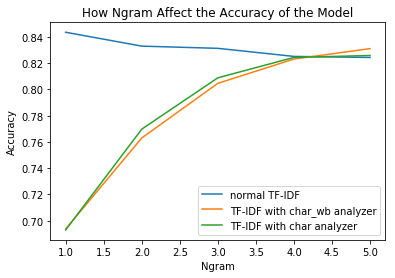

In [142]:
plt.plot([1,2,3,4,5], ngram_arc, label='normal TF-IDF')
plt.plot([1,2,3,4,5], ngram_arc_wb, label='TF-IDF with char_wb analyzer')
plt.plot([1,2,3,4,5], ngram_arc_char, label='TF-IDF with char analyzer')

plt.xlabel('Ngram')
plt.ylabel('Accuracy')

plt.title('How Ngram Affect the Accuracy of the Model')

plt.legend()

plt.show()

In [20]:
#model for score predicting
# TF-idf vectorizer with 'char' analyzer
def score_test_char(c=0.01, ngram=5, trials=100):
    total = 0
    tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3), analyzer='char')
    tfidf_vectorizer.fit(comment_data)
    comment_vectorized = tfidf_vectorizer.transform(comment_data)

    for i in range(trials):
        data_train, data_test, target_train, target_test = train_test_split(
            comment_vectorized, score_pro, test_size = 0.1)

        model = LinearSVC(C=0.01)
        model.fit(data_s_train, score_train)
        total += accuracy_score(score_test, model.predict(data_s_test))
    accuracy = total / trials
    print("Accuracy: ", accuracy)

# TF-idf vectorizer with 'char_wb' analyzer
def score_test_wb(c=0.01, ngram=5, trials=100):
    total = 0
    tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3), analyzer='char_wb')
    tfidf_vectorizer.fit(comment_data)
    comment_vectorized = tfidf_vectorizer.transform(comment_data)

    for i in range(trials):
        data_train, data_test, target_train, target_test = train_test_split(
            comment_vectorized, score_pro, test_size = 0.1)

        model = LinearSVC(C=0.01)
        model.fit(data_s_train, score_train)
        total += accuracy_score(score_test, model.predict(data_s_test))
    accuracy = total / trials
    print("Accuracy: ", accuracy)

#score_test_wb()
#score_test_char()

In [30]:
#print(comment_vectorized.shape[0])
#print(data_test[0])
#for i in range(data_train.shape[0]):

pred_result = score_model.predict(comment_vectorized)
#print(pred_result.shape)

index_arr0 = []
index_arr1 = []
index_arr2 = []
index_arr3 = []
index_arr4 = []

pred_ctr0 = 0
pred_ctr1 = 0
pred_ctr2 = 0
pred_ctr3 = 0
pred_ctr4 = 0

for i in range(pred_result.size):
    #print(int(pred_result[0]))
    if (int(pred_result[i]) == 4):
        index_arr4.append(i)
        pred_ctr4 += 1
    elif(int(pred_result[i]) == 3):
        #print(i)
        #print(comment_data[i])
        index_arr3.append(i)
        pred_ctr += 1
    elif (int(pred_result[i]) == 2):
        index_arr2.append(i)
        pred_ctr2 += 1
    elif (int(pred_result[i]) == 1):
        index_arr1.append(i)
        pred_ctr1 += 1
    elif (int(pred_result[i]) == 0):
        index_arr0.append(i)
        pred_ctr0 += 1
        
index_arr4 = np.asarray(index_arr4)
index_arr3 = np.asarray(index_arr3)
index_arr2 = np.asarray(index_arr2)
index_arr1 = np.asarray(index_arr1)
index_arr0 = np.asarray(index_arr0)
print(index_arr4.shape)
print(index_arr3.shape)
print(index_arr2.shape)
print(index_arr1.shape)
print(index_arr0.shape)


accuracy2 = accuracy_score(score_pro, score_model.predict(comment_vectorized))
print(accuracy2)

num0 = 0
num1 = 0
num2 = 0
num3 = 0
num4 = 0
for i in range(score_pro.size):
    if (score_pro[i] == 0) and (i not in index_arr0):
        num0 += 1
    elif (score_pro[i] == 1) and (i not in index_arr1):
        num1 += 1
    elif score_pro[i] == 2:
        num2 += 1
    elif (score_pro[i] == 3) and (i not in index_arr3):
        num3 += 1
    elif (score_pro[i] == 4) and (i not in index_arr4):
        num4 += 1
print(num2)        
print(pred_ctr0 / num0)
print(pred_ctr1 / num1)
print(pred_ctr2 / num2)
print(pred_ctr3 / num3)
print(pred_ctr4 / num4)

#Essentially, 80% of the 5000 comments give an aggression score of 2
#The model is thus predicting 2 for everything and getting an accuracy of 80%

(0,)
(0,)
(5000,)
(0,)
(0,)
0.8024
4012
0.0
0.0
1.2462612163509472
0.0
0.0


In [76]:
#tests true accuracy of trial models

pred_svc = trial_model.predict(trial_data)

index_arr0 = []
index_arr1 = []
index_arr2 = []
index_arr3 = []
index_arr4 = []

pred_ctr0 = 0
pred_ctr1 = 0
pred_ctr2 = 0
pred_ctr3 = 0
pred_ctr4 = 0

for i in range(pred_svc.size):
    if (int(pred_svc[i]) == 4):
        index_arr4.append(i)
        pred_ctr4 += 1
    elif(int(pred_svc[i]) == 3):
        index_arr3.append(i)
        pred_ctr3 += 1
    elif (int(pred_svc[i]) == 2):
        index_arr2.append(i)
        pred_ctr2 += 1
    elif (int(pred_svc[i]) == 1):
        index_arr1.append(i)
        pred_ctr1 += 1
    elif (int(pred_svc[i]) == 0):
        index_arr0.append(i)
        pred_ctr0 += 1
        
index_arr4 = np.asarray(index_arr4)
index_arr3 = np.asarray(index_arr3)
index_arr2 = np.asarray(index_arr2)
index_arr1 = np.asarray(index_arr1)
index_arr0 = np.asarray(index_arr0)

print("0",index_arr0.shape)
print("1",index_arr1.shape)
print("2",index_arr2.shape)
print("3",index_arr3.shape)
print("4",index_arr4.shape)


accuracy2 = accuracy_score(trial_target, trial_model.predict(trial_data))
print("technically",accuracy2)

num0 = 0
num1 = 0
num2 = 0
num3 = 0
num4 = 0
for i in range(trial_target.size):
    if (trial_target[i] == 0):
        num0 += 1
    elif (trial_target[i] == 1):
        num1 += 1
    elif trial_target[i] == 2:
        num2 += 1
    elif (trial_target[i] == 3):
        num3 += 1
    elif (trial_target[i] == 4):
        num4 += 1       
print("0 %",pred_ctr0 / num0)
print("1 %",pred_ctr1 / num1)
print("2 %",pred_ctr2 / num2)
print("3 %",pred_ctr3 / num3)
print("4 %",pred_ctr4 / num4)
print("\n")







pred_lrt = lrt_model.predict(trial_data)

index_arr0 = []
index_arr1 = []
index_arr2 = []
index_arr3 = []
index_arr4 = []

pred_ctr0 = 0
pred_ctr1 = 0
pred_ctr2 = 0
pred_ctr3 = 0
pred_ctr4 = 0

for i in range(pred_lrt.size):
    if (int(pred_lrt[i]) == 4):
        index_arr4.append(i)
        pred_ctr4 += 1
    elif(int(pred_lrt[i]) == 3):
        index_arr3.append(i)
        pred_ctr3 += 1
    elif (int(pred_lrt[i]) == 2):
        index_arr2.append(i)
        pred_ctr2 += 1
    elif (int(pred_lrt[i]) == 1):
        index_arr1.append(i)
        pred_ctr1 += 1
    elif (int(pred_lrt[i]) == 0):
        index_arr0.append(i)
        pred_ctr0 += 1
        
index_arr4 = np.asarray(index_arr4)
index_arr3 = np.asarray(index_arr3)
index_arr2 = np.asarray(index_arr2)
index_arr1 = np.asarray(index_arr1)
index_arr0 = np.asarray(index_arr0)
print("0",index_arr0.shape)
print("1",index_arr1.shape)
print("2",index_arr2.shape)
print("3",index_arr3.shape)
print("4",index_arr4.shape)


accuracy2 = accuracy_score(trial_target, lrt_model.predict(trial_data))
print("technically",accuracy2)

num0 = 0
num1 = 0
num2 = 0
num3 = 0
num4 = 0
for i in range(trial_target.size):
    if (trial_target[i] == 0):
        num0 += 1
    elif (trial_target[i] == 1):
        num1 += 1
    elif trial_target[i] == 2:
        num2 += 1
    elif (trial_target[i] == 3):
        num3 += 1
    elif (trial_target[i] == 4):
        num4 += 1      
print("0 %",pred_ctr0 / num0)
print("1 %",pred_ctr1 / num1)
print("2 %",pred_ctr2 / num2)
print("3 %",pred_ctr3 / num3)
print("4 %",pred_ctr4 / num4)

#ratio of predicted count to ideal count 

0 (4153,)
1 (7,)
2 (25357,)
3 (43,)
4 (0,)
technically 0.6003721244925575
0 % 0.509820770930518
1 % 0.001045244139166791
2 % 1.8330803151883177
3 % 0.050292397660818715
4 % 0.0


0 (7677,)
1 (4183,)
2 (17508,)
3 (192,)
4 (0,)
technically 0.843809201623816
0 % 0.9424257304198379
1 % 0.6246080334478125
2 % 1.2656690522663196
3 % 0.22456140350877193
4 % 0.0


In [188]:
#Predicting user input

user_input = input("Write your comment here: ")
#print(user_input)

user_input = PUNCTUATION_NO_SPACE.sub("",user_input.lower())
user_input = NEWLINE.sub("",user_input)
user_input = PUNCTUATION_SPACE.sub(" ",user_input.lower())
user_input = user_input.split()
user_input = [word for word in user_input if word not in skip]

lemmatizer = WordNetLemmatizer()
comment_data[i] = ' '.join([lemmatizer.lemmatize(word) for word in user_input])

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 1))
tfidf_vectorizer.fit(comment_data)
user_input_vec = tfidf_vectorizer.transform(user_input)

predicted_result = model_ub.predict(user_input_vec)
print(predicted_result)
if (np.mean(predicted_result > 0.5)):
    print("---Your input comment is classified as aggressive!---")
else:
    print("---Your input comment is classified as nonaggressive!---")

Write your comment here: I linked it to the article.
[0. 0.]
---Your input comment is classified as nonaggressive!---


In [176]:
print(user_input_vec)
print(predicted_result.shape)

  (0, 29478)	1.0
  (1, 20540)	1.0
  (2, 21662)	1.0
(3,)
